In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("data/clean_data.csv", low_memory=False)

In [2]:
from datetime import datetime
import time

df = df.iloc[:300000]
# Convert to unix timestamp
df['ts'] = pd.to_datetime(df['ts'], format='%Y-%m-%d %H:%M:%S')
df['ts'] = df['ts'].apply(lambda x: time.mktime(x.timetuple()))
df

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,geodesic_distance,hour,mins,day,month,year,dayofweek,booking_timestamp,booking_time_diff_hr,booking_time_diff_min
0,1.602295e+09,-1.0,12.975773,77.571070,12.878468,77.445330,17.38,7,34,10,10,2020,5,1602315256,445087,26705254
1,1.602385e+09,-1.0,12.930813,77.609530,12.960320,77.587210,4.06,8,23,11,10,2020,6,1602404622,24,1489
2,1.602398e+09,-1.0,12.960213,77.587460,12.930824,77.609610,4.04,11,57,11,10,2020,6,1602417437,3,213
3,1.602851e+09,-1.0,12.924353,77.549410,12.932216,77.581825,3.62,17,51,16,10,2020,4,1602870667,125,7553
4,1.604029e+09,-1.0,12.945731,77.622500,12.973030,77.616840,3.08,9,0,30,10,2020,4,1604048444,327,19629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1.614007e+09,7997.0,12.931921,77.684060,12.991744,77.667790,6.85,20,48,22,2,2021,0,1614026882,0,10
299996,1.614008e+09,7997.0,12.931959,77.684006,12.991744,77.667790,6.84,20,58,22,2,2021,0,1614027490,0,10
299997,1.614056e+09,7997.0,12.991799,77.668230,12.932350,77.683700,6.79,10,27,23,2,2021,1,1614076056,13,809
299998,1.614057e+09,7997.0,12.991622,77.668230,12.932350,77.683700,6.77,10,44,23,2,2021,1,1614077045,0,8


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

x = df[["ts", "pick_lat", "pick_lng"]]
y = df['dayofweek']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

2024-03-29 20:22:32.510535: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10


2024-03-29 20:22:34.033049: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


6563/6563 [==============================] - 46s 7ms/step - loss: -1215556.1250 - accuracy: 0.1584 - val_loss: -4232128.5000 - val_accuracy: 0.1579
Epoch 2/10
6563/6563 [==============================] - 80s 12ms/step - loss: -12124956.0000 - accuracy: 0.1584 - val_loss: -23271174.0000 - val_accuracy: 0.1579
Epoch 3/10
6563/6563 [==============================] - 67s 10ms/step - loss: -41709220.0000 - accuracy: 0.1584 - val_loss: -64976112.0000 - val_accuracy: 0.1579
Epoch 4/10
6563/6563 [==============================] - 84s 13ms/step - loss: -97907976.0000 - accuracy: 0.1584 - val_loss: -137255376.0000 - val_accuracy: 0.1579
Epoch 5/10
6563/6563 [==============================] - 35s 5ms/step - loss: -188106832.0000 - accuracy: 0.1584 - val_loss: -247530992.0000 - val_accuracy: 0.1579
Epoch 6/10
6563/6563 [==============================] - 28s 4ms/step - loss: -320283168.0000 - accuracy: 0.1584 - val_loss: -403504160.0000 - val_accuracy: 0.1579
Epoch 7/10
6563/6563 [=================

In [5]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

2813/2813 [==============================] - 7s 2ms/step - loss: -1630485504.0000 - accuracy: 0.1579
Loss: -1630485504.0, Accuracy: 0.15791110694408417


In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Predict probabilities for the test set
y_pred_proba = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(cm)

2813/2813 [==============================] - 6s 2ms/step
Precision: 0.02493591901234568
Recall: 0.1579111111111111
F1 Score: 0.04307052376139237
Confusion Matrix:
[[    0 13876     0     0     0     0     0]
 [    0 14212     0     0     0     0     0]
 [    0 14705     0     0     0     0     0]
 [    0 11880     0     0     0     0     0]
 [    0  8251     0     0     0     0     0]
 [    0 13767     0     0     0     0     0]
 [    0 13309     0     0     0     0     0]]


/home/kakan/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


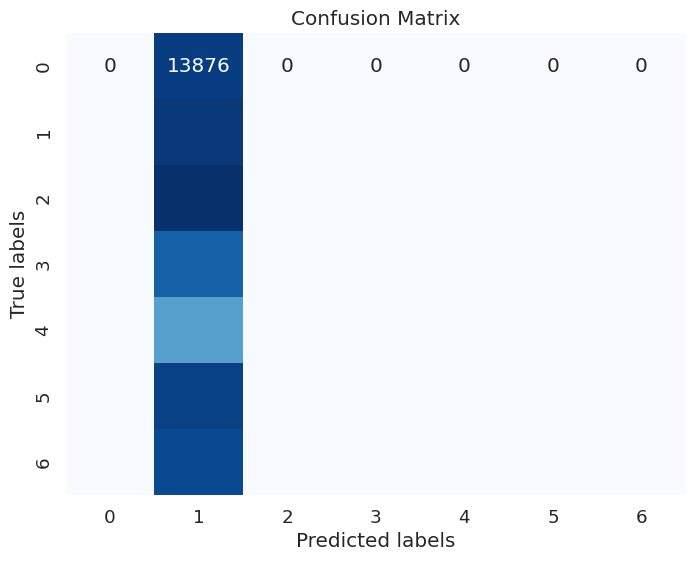

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Assuming X_train, X_test, y_train, y_test are your training and test sets
# and svm is your trained SVM model
y_score = model.predict(X_test)

num_classes = 3

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])  # Adjust the classes as per your dataset

2813/2813 [==============================] - 24s 9ms/step


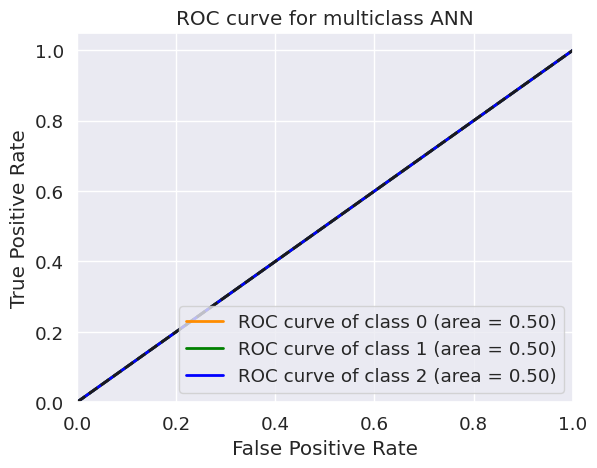

In [29]:
import numpy as np
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, 0])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['darkorange', 'green', 'blue']  # Define colors as per the number of classes
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for multiclass ANN')
plt.legend(loc="lower right")
plt.show()